<H1> Unit 2 Assignment EDA - Default Credit Card Clients </h1>
<H3> Ryan Moore </H3>
<H3> Data 645 </H3>

<H1> Step One: Exploratory Analysis </H1>
<h2> Data </h2> 

<h4> Nature of the Data </h4>

The dataset is a list of credit card clients in Taiwan that are in default. This data is structured and tabular. The data has both quantitative and qualitative variables, however, all the data is stored in a numeric variable.  For example, the sex was converted so that 1 is equal to a male and 2 is equal to a female. 

<h4> Location and Source of the Data </h4>

The dataset is from the UC Irvine Machine Learning Repository and can be found at https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients. 

It is now stored in a csv file that was downloaded onto my computer. 



<h4> Explain the Variable </h4>

There is a total of 25 variables.  They are a mix of the clients demographic information, financial history, bill/payment data, and whether the client defaulted the next month. 




| Column Name                  | Description                                                                                                |
| ---------------------------- | ---------------------------------------------------------------------------------------------------------- |
| `ID`                         | Unique identifier for each client                                                                          |
| `LIMIT_BAL`                  | Amount of given credit per customer id in New Taiwan (NT)dollars                                           |
| `SEX`                        | Gender of the client 1 = male, 2 = female                                                                  |
| `EDUCATION`                  | Education level of the client (1 = graduate school, 2 = university, 3 = high school, 4 = others)           |
| `MARRIAGE`                   | Marital status (1 = married, 2 = single, 3 = others)                                                       |
| `AGE`                        | Age in years                                                                                               |
| `PAY_0` to `PAY_6`           | Repayment status from April to September (e.g., -1 = pay duly, 0 = pay on time, 1 = one month delay, etc.) |
| `BILL_AMT1` to `BILL_AMT6`   | Amount of bill statement from April to September                                                           |
| `PAY_AMT1` to `PAY_AMT6`     | Amount paid in the previous month (April to September)                                                     |
| `default payment next month` | Target variable: whether the client defaulted the next month (1 = yes, 0 = no)                             |


<h2> Exploration <h2>

In [81]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [82]:
#Convert CSV Into Dataframe To Use In Notebook
df = pd.read_csv('/Users/Ryan/Code/Data645/DefaultCreditCardClients.csv')

In [83]:
#Ensure data loaded correctly and see the first 5 rows
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [84]:
#Explore the shape of the data to see how many rows and columns there are
df.shape


(30000, 25)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

There are 30,000 clients in this dataset based on the total rows being 30,000.  There are 25 different variables that are used in this data set. All of the data is integers.  There is no null values in this data set.  

In [86]:
#Get an understanding of the data in each column
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<h4> Key takeaways: </h4>
The key findings were that the limit balance has a big variation in the credit limits in this dataset have a standard deviation of $129,748 New Taiwan (NT) Dollars.  Also, we can see that the min is only $10,000 NT Dollars and the max is $1,000,000 NT Dollars which shows us that there is a big difference between the highest credit client and the lowest credit client.  The mean is $167,484 NT Dollars.  

The sex has a mean of 1.6 which means there are more female clients in this dataset due to the female being equal to 2 and male being equal to 1. The min and max are 1 and 2 meaning that the values are clean and do not have values outside of the parameters.  

The education needs some cleaning because the min and max shows there are entries from 0 to 6 however only numbers 1 through 4 have meaning.  

The marriage min is 0 meaning that it will need to be cleaned as only numbers 1 through 3 have meaning.  

The mean age is 35 years old with the youngest client being 21 and the oldest being 79 years old. 

The payment history has means that are below 0 meaning that most people either paid on time (0) or paid early (-1 or -2).  The min being -2 is a good sign as it shows that the clients paid early.  The max being 8 shows that some clients are 8 months overdue.  

The bill amount shows that the mean bills decreased from $51,223 to 38,871.  The max bill is 1.6M NT Dollars throughout the 6 months.  The min bill is negative meaning that clients are likely getting a refund. 

The payment amount mean is typically around $5,000 NT Dollars.  The min is 0 meaning that some clients do not need to pay.  The max is 1.68M meaning that some clients owe a lot.  

The mean default payment next month is 0.221 which means that 22.1% of clients defaulted.  The min is 0 meaning that they did not default the next month, and the max is 1 meaning that they did default, so all the values have meaning. 


In [87]:
marriage_map = {
    1: "married",
    2: "single",
    3: "other",
    0: "unknown"  
}
print("Marriage Status Distribution:")
for k, v in df['MARRIAGE'].value_counts().items():
    status = marriage_map.get(k, f"unknown ({k})")
    print(f" - {v} clients are {status}")
print()

Marriage Status Distribution:
 - 15964 clients are single
 - 13659 clients are married
 - 323 clients are other
 - 54 clients are unknown



In [88]:
education_map = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "other",
    0: "unknown",
    5: "unknown",
    6: "unknown"
}
print("Education Level Distribution:")
for k, v in df['EDUCATION'].value_counts().items():
    level = education_map.get(k, f"unknown ({k})")
    print(f" - {v} clients have {level} education")
print()


Education Level Distribution:
 - 14030 clients have university education
 - 10585 clients have graduate school education
 - 4917 clients have high school education
 - 280 clients have unknown education
 - 123 clients have other education
 - 51 clients have unknown education
 - 14 clients have unknown education



<h2> Visualization <H2>

<h3> Quantitative Variables Graphs </h3>

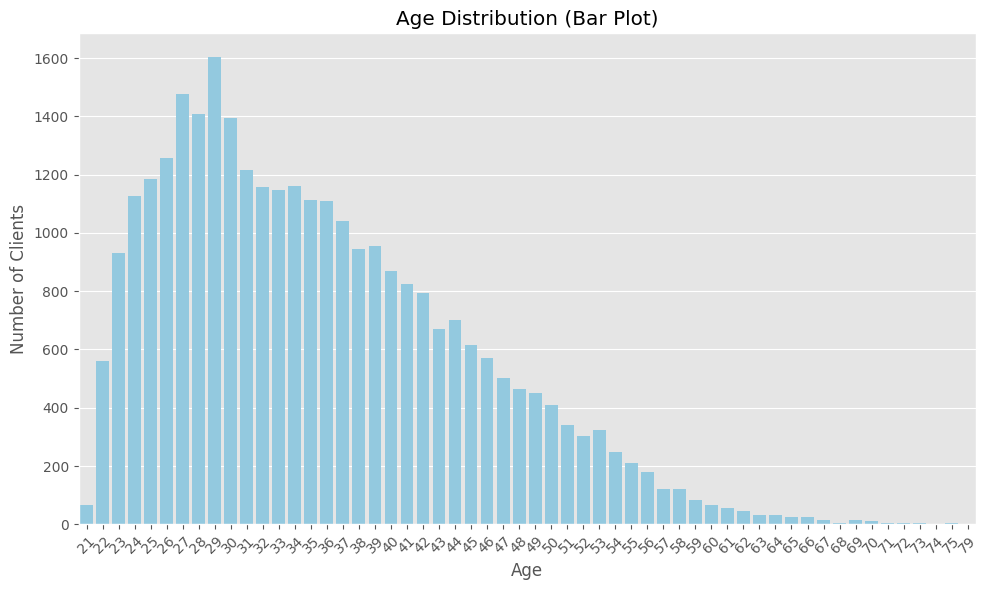

In [89]:
# Bar plot of Age (counts per age)
plt.figure(figsize=(10, 6))
age_counts = df['AGE'].value_counts().sort_index()  # sort so the bars go in age order
sns.barplot(x=age_counts.index, y=age_counts.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.title('Age Distribution (Bar Plot)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Credit Limit Distribution')

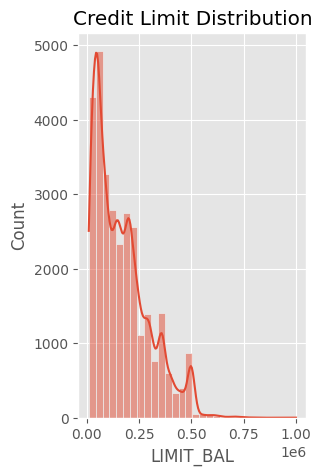

In [90]:
# Histogram of Credit Limit
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 2)
sns.histplot(df['LIMIT_BAL'], kde=True, bins=30)
plt.title('Credit Limit Distribution')


<H3> Qualitative Variables Graphs </h3>

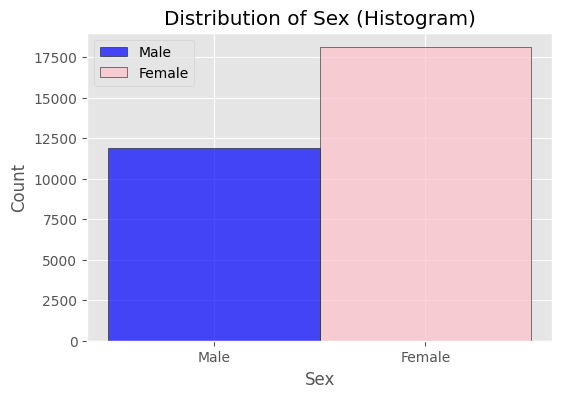

In [91]:
# Histogram of Sex 
plt.figure(figsize=(6, 4))
plt.hist(df[df['SEX'] == 1]['SEX'], bins=1, edgecolor='black', color='blue', label='Male', alpha=0.7)
plt.hist(df[df['SEX'] == 2]['SEX'], bins=1, edgecolor='black', color='pink', label='Female', alpha=0.7)
plt.xticks([1, 2], ['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex (Histogram)')
plt.legend()
plt.show()


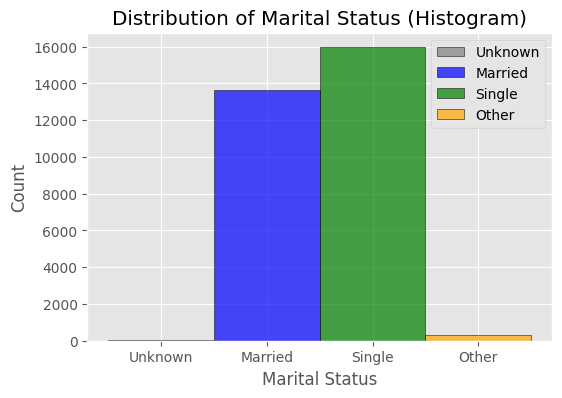

In [92]:
# Histogram of Marital Status (including unknown)
plt.figure(figsize=(6, 4))
plt.hist(df[df['MARRIAGE'] == 0]['MARRIAGE'], bins=1, edgecolor='black', color='gray', label='Unknown', alpha=0.7)
plt.hist(df[df['MARRIAGE'] == 1]['MARRIAGE'], bins=1, edgecolor='black', color='blue', label='Married', alpha=0.7)
plt.hist(df[df['MARRIAGE'] == 2]['MARRIAGE'], bins=1, edgecolor='black', color='green', label='Single', alpha=0.7)
plt.hist(df[df['MARRIAGE'] == 3]['MARRIAGE'], bins=1, edgecolor='black', color='orange', label='Other', alpha=0.7)

plt.xticks([0, 1, 2, 3], ['Unknown', 'Married', 'Single', 'Other'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status (Histogram)')
plt.legend()
plt.show()



<h3>Pairwise Correlations </h3>

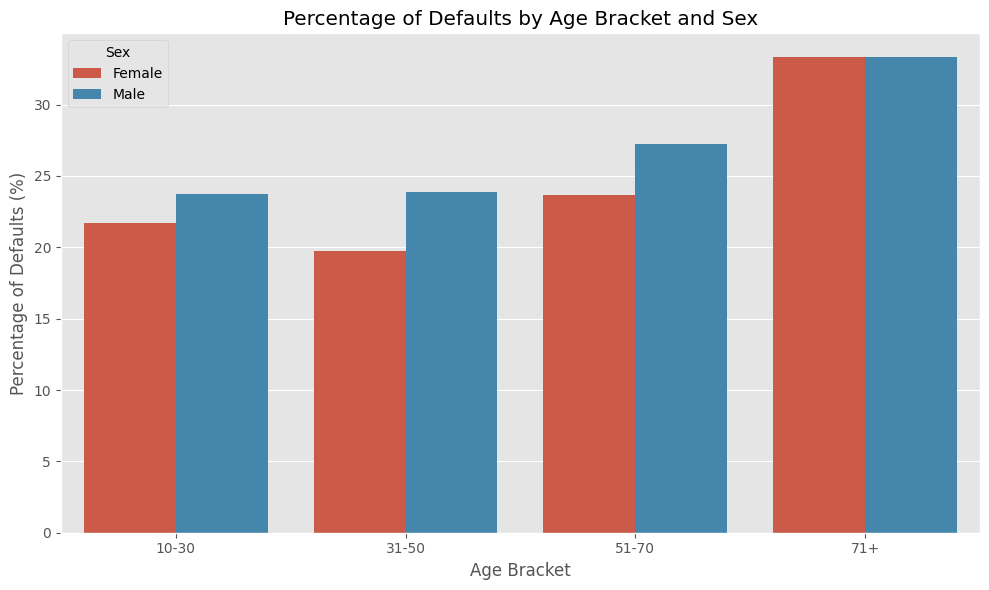

In [93]:
# Map labels
df['Sex_Label'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['Default_Label'] = df['default payment next month'].map({0: 'No Default', 1: 'Default'})

# Define 20-year age brackets
age_bins = [10, 30, 50, 70, 90]
age_labels = ['10-30', '31-50', '51-70', '71+']
df['Age_Bracket'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=True)

# Group by Sex, Age Bracket, and Default_Label
summary = df.groupby(['Sex_Label', 'Age_Bracket', 'Default_Label']).size().reset_index(name='Count')

# Calculate percentage per group
summary['Total'] = summary.groupby(['Sex_Label', 'Age_Bracket'])['Count'].transform('sum')
summary['Percentage'] = (summary['Count'] / summary['Total'] * 100).round(2)

# Filter for only 'Default' category to plot percentages of default
default_summary = summary[summary['Default_Label'] == 'Default']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=default_summary,
    x='Age_Bracket',
    y='Percentage',
    hue='Sex_Label'
)

plt.title("Percentage of Defaults by Age Bracket and Sex")
plt.ylabel("Percentage of Defaults (%)")
plt.xlabel("Age Bracket")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

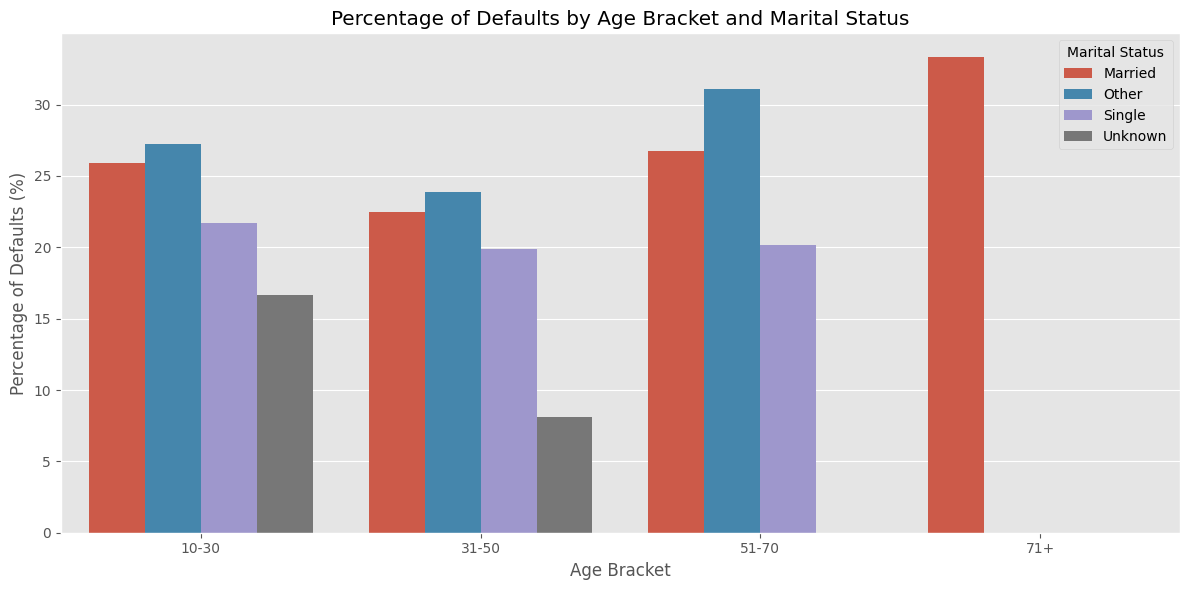

In [94]:
# Map labels
df['Marriage_Label'] = df['MARRIAGE'].map({0: 'Unknown', 1: 'Married', 2: 'Single', 3: 'Other'})
df['Default_Label'] = df['default payment next month'].map({0: 'No Default', 1: 'Default'})

# Define 20-year age brackets
age_bins = [10, 30, 50, 70, 90]
age_labels = ['10-30', '31-50', '51-70', '71+']
df['Age_Bracket'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=True)

# Group by Marital Status, Age Bracket, and Default
grouped = df.groupby(['Marriage_Label', 'Age_Bracket', 'Default_Label']).size().reset_index(name='Count')

# Calculate total per Marriage_Label + Age_Bracket
grouped['Total'] = grouped.groupby(['Marriage_Label', 'Age_Bracket'])['Count'].transform('sum')

# Calculate percentage
grouped['Percentage'] = (grouped['Count'] / grouped['Total'] * 100).round(2)

# Filter for 'Default' only to plot percentage of defaults
default_only = grouped[grouped['Default_Label'] == 'Default']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=default_only,
    x='Age_Bracket',
    y='Percentage',
    hue='Marriage_Label'
)

plt.title("Percentage of Defaults by Age Bracket and Marital Status")
plt.ylabel("Percentage of Defaults (%)")
plt.xlabel("Age Bracket")
plt.legend(title="Marital Status")
plt.tight_layout()
plt.show()



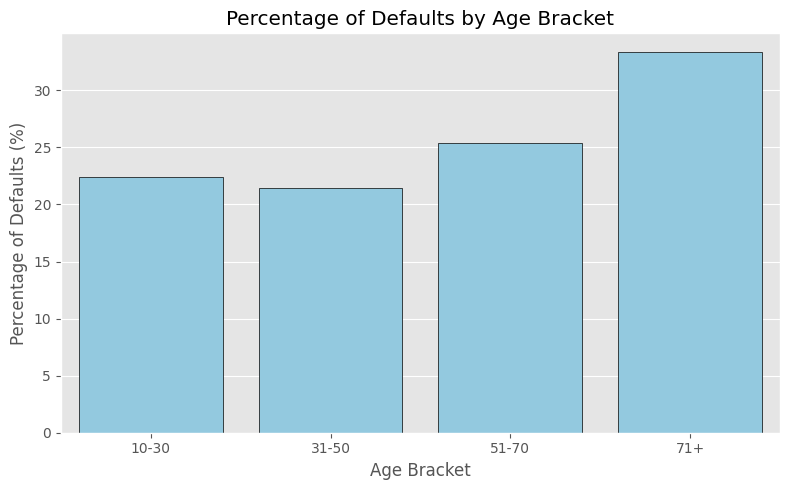

In [95]:
# Define age brackets
age_bins = [10, 30, 50, 70, 90]
age_labels = ['10-30', '31-50', '51-70', '71+']
df['Age_Bracket'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=True)

# Map default labels
df['Default_Label'] = df['default payment next month'].map({0: 'No Default', 1: 'Default'})

# Group by age bracket and default
grouped = df.groupby(['Age_Bracket', 'Default_Label']).size().reset_index(name='Count')

# Total per age bracket
grouped['Total'] = grouped.groupby('Age_Bracket')['Count'].transform('sum')

# Calculate percentage
grouped['Percentage'] = (grouped['Count'] / grouped['Total'] * 100).round(2)

# Filter for Default only
default_only = grouped[grouped['Default_Label'] == 'Default']

# Plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=default_only,
    x='Age_Bracket',
    y='Percentage',
    color='skyblue',
    edgecolor='black'
)

plt.title("Percentage of Defaults by Age Bracket")
plt.ylabel("Percentage of Defaults (%)")
plt.xlabel("Age Bracket")
plt.tight_layout()
plt.show()


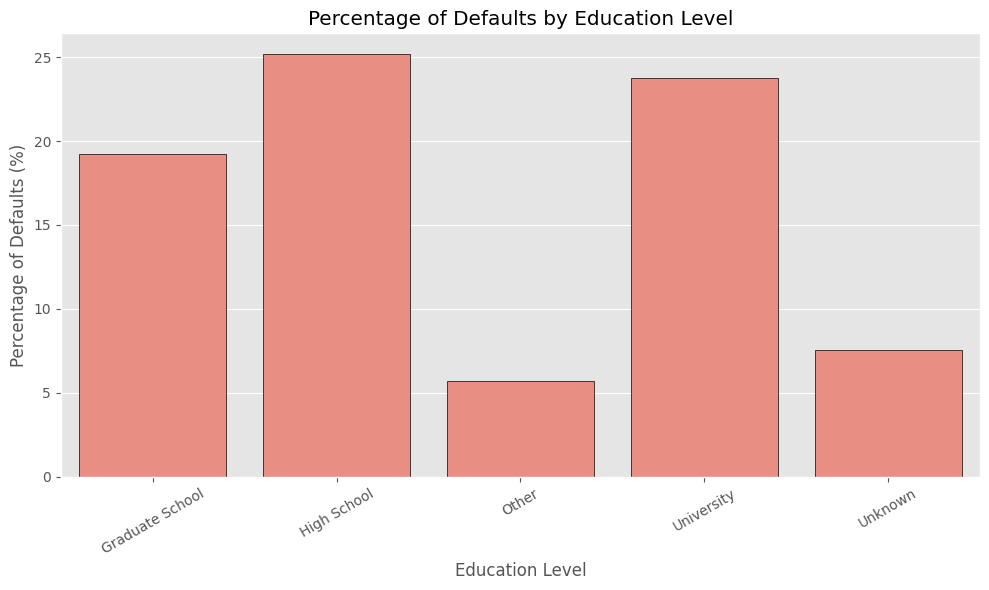

In [96]:
# Map education labels
df['Education_Label'] = df['EDUCATION'].map({
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Other',
    0: 'Unknown',
    5: 'Unknown',
    6: 'Unknown'
})

# Map default labels
df['Default_Label'] = df['default payment next month'].map({0: 'No Default', 1: 'Default'})

# Group by education and default status
edu_group = df.groupby(['Education_Label', 'Default_Label']).size().reset_index(name='Count')

# Get total clients per education level
edu_group['Total'] = edu_group.groupby('Education_Label')['Count'].transform('sum')

# Calculate percentage
edu_group['Percentage'] = (edu_group['Count'] / edu_group['Total'] * 100).round(2)

# Filter for defaults only
default_only = edu_group[edu_group['Default_Label'] == 'Default']

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=default_only,
    x='Education_Label',
    y='Percentage',
    color='salmon',
    edgecolor='black'
)

plt.title("Percentage of Defaults by Education Level")
plt.ylabel("Percentage of Defaults (%)")
plt.xlabel("Education Level")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

<h3> Key Takeaways: </h3>

The main takeaways from these were that males defaulted at a higher rate than females.  Older clients defaulted at higher rates than younger clients.  Single people under the age of 60 were slightly less likely to default than married or other.  The higher the education level a client had, the lower the percentage of defaults except for other and unknown. 


<H1> Step Two: Preprocessing <H1>

<H2> Data Cleaning <H2>

In [97]:
#Rename the Pay_0 To Pay_1 To match the style of the other columns
df.rename(columns={'PAY_0': 'PAY_1'}, inplace= True)

In [98]:
#Get the mean of the education

df['EDUCATION'].mean()

1.8531333333333333

In [99]:
#Use the mean for values by rounding to 2 for input
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 2)

In [100]:
#Print the updated eduation distrubtion
print("Education Level Distribution:")
for k, v in df['EDUCATION'].value_counts().items():
    level = education_map.get(k, f"unknown ({k})")
    print(f" - {v} clients have {level} education")
print()

Education Level Distribution:
 - 14375 clients have university education
 - 10585 clients have graduate school education
 - 4917 clients have high school education
 - 123 clients have other education



<h2> Data Reduction <H2>

In [101]:
# List of selected numeric features
features_for_pca = [
    'LIMIT_BAL', 'AGE',
    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_for_pca])

# Apply PCA (keep 95% of variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check results
print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_pca.shape}")
print("Explained variance ratios:", pca.explained_variance_ratio_)

Original shape: (30000, 20)
Reduced shape: (30000, 12)
Explained variance ratios: [0.32691551 0.20310814 0.07543899 0.05014194 0.0461459  0.04440639
 0.04368688 0.03918403 0.03663652 0.03502348 0.02957272 0.02021896]


In [103]:
# Create a DataFrame for PCA components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the target variable back
pca_df['Default'] = df['default payment next month']

Performed PCA to reduce the features into 12 categories and scaled the data so that columns like the credit limit balance would not dominate over age.  The result is all the columns have a mean of 0 and a standard deviation of 1.  

The PCA was set to reduce so that it kept enough components to explain 95% of the variance.  This cut the features down from 20 to 12.  

Lastly, the PCA had the target column attached into a new data frame called PCA_DF.  

<H2> Data Transformation <h2>

In [104]:
#Create a new feature called Utilization Ratio 
df['Utilization_Ratio'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3',
                              'BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1) / df['LIMIT_BAL']

In [105]:
#Add new feature to the PCA DF
pca_df['Utilization_Ratio'] = df['Utilization_Ratio']

In [106]:
#Ensure that features were added
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Default,Utilization_Ratio
0,-1.882545,0.950519,-0.635311,-1.301333,0.446332,-0.030903,-0.011523,-0.151913,-0.168605,3.028839,0.668630,0.207799,1,0.064200
1,-0.750441,2.091268,0.489198,-0.781045,0.079028,0.120256,0.179398,0.152436,-0.155184,-0.949828,0.023566,-0.440040,1,0.023718
2,-0.831802,1.043824,0.021472,-0.118971,0.003329,-0.101834,0.103799,0.028856,-0.061490,-0.116303,-0.286394,0.010800,0,0.188246
3,-0.191578,0.863092,-0.328582,0.051712,-0.241338,-0.035969,-0.087962,-0.083516,-0.016847,0.056527,-0.659508,-0.024124,0,0.771113
4,-0.881239,0.054430,0.834988,2.019853,-1.176848,0.169491,-0.572443,-0.363739,-1.059021,-0.127608,-1.332602,-0.181264,0,0.364463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.465407,-0.812901,-0.795730,0.222874,-0.505435,-0.767524,-0.391536,-0.440540,-0.192230,0.084692,0.122086,-0.383555,0,0.549507
29996,-1.826196,-0.166504,0.071634,0.758088,-0.592182,0.140179,-0.085445,0.423197,-0.110729,-0.783052,-0.518512,0.298650,0,0.023536
29997,0.322151,3.238358,0.695109,0.391501,0.334243,0.567246,0.224318,0.835937,-0.125658,3.435828,1.041586,0.556153,1,0.391644
29998,0.591726,-0.853788,2.443873,0.346852,0.362364,-1.172280,-2.204289,-1.232226,4.294981,1.027712,-0.661387,1.063695,1,0.555440


The data transformation performed was a standardization during the PCA using a standard scaler.  

The next was to create a new feature called the utilization ratio and add that to the PCA df. 

<h2> Analysis <h2>

In [107]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Default,Utilization_Ratio
0,-1.882545,0.950519,-0.635311,-1.301333,0.446332,-0.030903,-0.011523,-0.151913,-0.168605,3.028839,0.668630,0.207799,1,0.064200
1,-0.750441,2.091268,0.489198,-0.781045,0.079028,0.120256,0.179398,0.152436,-0.155184,-0.949828,0.023566,-0.440040,1,0.023718
2,-0.831802,1.043824,0.021472,-0.118971,0.003329,-0.101834,0.103799,0.028856,-0.061490,-0.116303,-0.286394,0.010800,0,0.188246
3,-0.191578,0.863092,-0.328582,0.051712,-0.241338,-0.035969,-0.087962,-0.083516,-0.016847,0.056527,-0.659508,-0.024124,0,0.771113
4,-0.881239,0.054430,0.834988,2.019853,-1.176848,0.169491,-0.572443,-0.363739,-1.059021,-0.127608,-1.332602,-0.181264,0,0.364463


In [108]:
# Split features and target
X = pca_df.drop('Default', axis=1)
y = pca_df['Default']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
# Initialize and fit the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [110]:
# Predict on test set
y_pred = log_reg.predict(X_test)

# Classification results
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Model coefficients
coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
print("Logistic Regression Coefficients:")
print(coefficients.sort_values(key=abs, ascending=False))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.22      0.34      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.61      9000
weighted avg       0.79      0.81      0.77      9000

Confusion Matrix:
[[6833  207]
 [1522  438]]
Logistic Regression Coefficients:
PC2                  0.417629
PC10                 0.390343
PC12                 0.331109
Utilization_Ratio   -0.249432
PC3                 -0.160695
PC4                  0.125244
PC11                 0.113329
PC1                  0.094844
PC5                  0.081137
PC6                  0.080223
PC7                  0.045642
PC9                  0.037287
PC8                  0.022380
dtype: float64


In [111]:
# Get the loadings (aka weights of each original feature on each PC)
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=features_for_pca)

# Top features contributing to PC2
print("Top contributors to PC2:")
print(loadings['PC2'].sort_values(key=np.abs, ascending=False).head(5))

# Top features for PC10 (if exists)
if 'PC10' in loadings.columns:
    print("\nTop contributors to PC10:")
    print(loadings['PC10'].sort_values(key=np.abs, ascending=False).head(5))

# Top features for PC12 (if exists)
if 'PC12' in loadings.columns:
    print("\nTop contributors to PC12:")
    print(loadings['PC12'].sort_values(key=np.abs, ascending=False).head(5))

Top contributors to PC2:
PAY_4        0.348129
PAY_3        0.347142
PAY_2        0.337700
PAY_5        0.335298
LIMIT_BAL   -0.313392
Name: PC2, dtype: float64

Top contributors to PC10:
PAY_1        0.566203
PAY_6       -0.408870
PAY_5       -0.375204
LIMIT_BAL   -0.347309
PAY_2        0.343854
Name: PC10, dtype: float64

Top contributors to PC12:
PAY_1    0.607735
PAY_3   -0.541943
PAY_6    0.362860
PAY_2   -0.320703
PAY_5    0.175830
Name: PC12, dtype: float64


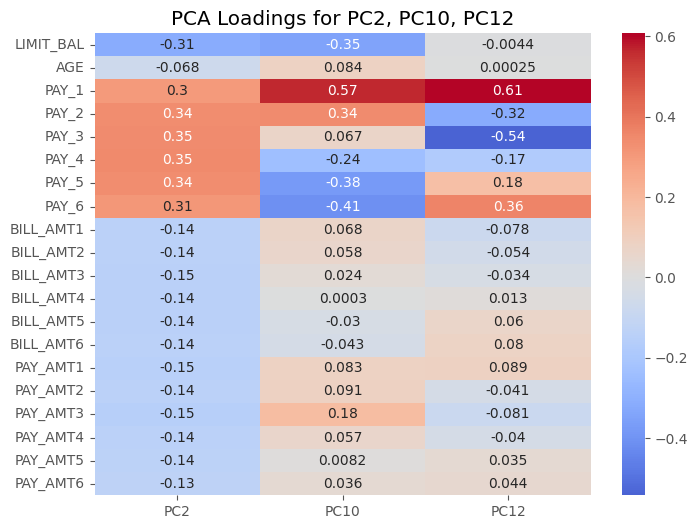

In [112]:
# Subset loadings for selected PCs
important_pcs = ['PC2', 'PC10', 'PC12']
subset = loadings[important_pcs]

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset, cmap='coolwarm', center=0, annot=True)
plt.title("PCA Loadings for PC2, PC10, PC12")
plt.show()

<h2> Conclusion <h2>

<h3> The model got the final results </h3>

<h3> Precision </h3>

When the model predicts the client will not default (0) it gets it right 82% of the time.

When the model predicts the client will default (1) it gets it right 68% of the time. 

<h3> Recall </h3>

The model correctly identifies 97% of clients that did not default this is very strong.

The model only catches 22% of clients that defaulted.  

This means the model is very good at catching who will not default, however, it is very bad at catching who will default. 

<h3> Accuracy </h3>

81% of the total predictions were correct, however, the majority of this came from the model predict clients that will not default correctly which makes up a larger percentage of the database. 

<h3> Findings Based On Results </h3>

The Repayment Status features, PAY_1 to PAY_6 columns, and the credit limit, LIMIT_BAL column, played the largest role in determining if a client would default or not.  This tells us that looking at a combination of if the client repayed on time or not in previous months combined with overall credit limit could if they would default. 

Clients that paying late and have lower credit limits have a higher tendency to default.

While clients that are paying on time or early and have a higher credit limit have a lower tendency to default. 


<h3> Limitations </h3>

The limitations that I had were the data focuses on payment history and credit limits but misses key information such as credit score and income.  These can be extremely useful in determining if a client would default. 

Some variables were messy and needed to be cleaned such as martial status and education which made the results harder to determine. 

The dataset is imbalance - more clients did not default.

The default payment next month did not show true risk as the amount that the client defaulted greatly impacts how much risk they are.  A client who misses a small payment is treated the same as one that missed a large one. 




<h3> Improvement Areas </h3>

The ways to improve would be to include additional financial features such as the credit score and income.  

Quantify the default amount so that the severity can be determined.  

Collect a more balanced dataset or sample the dataset so that the bias towards non-default clients is limited.  